<a href="https://colab.research.google.com/github/yashpatel0110/Object-Detection/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#            **Object Detection with YOLOv3**



In [13]:
# Step 1: Install required packages
!pip install opencv-python
!pip install opencv-python-headless

# Step 2: Download YOLOv3 weights and config files
# Download the YOLOv3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

# Download the YOLOv3 config file
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

# Download the COCO names file
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2024-12-02 06:15:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.3’

yolov3.weights.3    100%[===================>] 236.52M  11.6MB/s    in 24s     

2024-12-02 06:15:40 (9.94 MB/s) - ‘yolov3.weights.3’ saved [248007048/248007048]

--2024-12-02 06:15:40--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.3’

yolov3.cfg.3        100%[===================>]   8.15K  --.-KB/s    in 0s   

In [14]:
# Step 3: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 4: Load YOLO network
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Get the layer names of the network
layer_names = net.getLayerNames()

# Fix: Use .flatten() to handle scalar output issue with newer OpenCV versions
unconnected_out_layers = net.getUnconnectedOutLayers()
output_layers = [layer_names[i - 1] for i in unconnected_out_layers.flatten()]

# Load the COCO class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]


# Step 5: Upload an image
from google.colab import files
uploaded = files.upload()

Saving IMG_0552-scaled-e1611946320488.jpg to IMG_0552-scaled-e1611946320488 (1).jpg


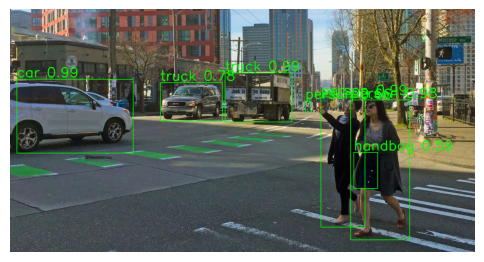

In [15]:
# Assuming the uploaded image is named 'input_image.jpg'
input_image_name = list(uploaded.keys())[0]

# Load the image
img = cv2.imread(input_image_name)
height, width, channels = img.shape

# Step 6: Preprocess the image for YOLO
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Initialize lists for detected bounding boxes, confidences, and class IDs
boxes = []
confidences = []
class_ids = []

# Step 7: Iterate over the detections and filter based on confidence
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Confidence threshold
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Perform non-max suppression to eliminate redundant overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Step 8: Draw bounding boxes and labels on the image
if np.isscalar(indices):
    indices = [indices]



for i in indices:
    box = boxes[i]
    x, y, w, h = box[0], box[1], box[2], box[3]
    label = str(classes[class_ids[i]])
    confidence = confidences[i]
    color = (0, 255, 0)  # Green for bounding boxes
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 4)



# Step 9: Convert image to RGB for displaying in Colab
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



# Display image using matplotlib with dynamically calculated figsize
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis for better visualization
plt.show()